# Experiment on feature aggregation with GBDT algorithms.
* This is an experimental idea that aggregate data points on longer time span than just one minute will improve performance and stability for any models other than RNN, especially in Fscore. 
* It is based on the thinking: An anomaly should and can only be determined by the features acrossing a rather large time span. The features extracted from the messages within only one minute are not enough to determine if there is an anomaly in this minute of time.   
* In this experiment, Aggregation of some time spans from 1 to 60 will be tested and the according mesurements (accuracy and fscore) will be compared. 

#### The base line has the following settings:
1. using aggregated data( max, avg, sum )
2. No slide window
3. Use StandardScaler

#### The evaluation matrix includs the following metrics:
1. Accuracy
2. F1-score
3. Precision
4. Recall

### Define the algrothim - GBDT

In [1]:
import numpy as np
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

print("============================ LightGBM ============================\n")
def train_test(train_x, train_y, test_x):
    # Set parameters which are referred from src/playground/gbdt_offline_sample/final_eval_gbm.py
    estNum = 300
    lr = 0.05

    if ALGORITHM == "LightGBM":
        gbm = LGBMClassifier(n_estimators=estNum, learning_rate=lr, max_depth=10, subsample=1, num_leaves=20, boosting_type='GBDT', reg_lambda=0) 
    elif ALGORITHM == "XGBoost":
        gbm = XGBClassifier(n_estimators=estNum, learning_rate=lr, max_depth=6, subsample=1, booster='gbtree') 
    elif ALGORITHM == "CatBoost":
        gbm = CatBoostClassifier(n_estimators=estNum, learning_rate=lr, max_depth=6, subsample=1, num_leaves=31, boosting_type='Plain')
    else:
        print("Please specify a GBDT algorithm.")
        exit(1)

    gbm.fit(train_x, train_y)
    predicted = gbm.predict(test_x)
    return predicted


============================ LightGBM ============================



### Integrated run

============================ LightGBM ============================

outlier: upper
agg_type: origin
Data combo: {'train': ['Code_Red_I', 'Nimda'], 'test': 'Slammer'}
Raw training datasets shape:  [(7200, 42), (8609, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (7308, 1301)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6331 869
Data combo: {'train': ['Nimda', 'Slammer'], 'test': 'Code_Red_I'}
Raw training datasets shape:  [(8609, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(7308, 1301), (6331, 869)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6600 600
Data combo: {'train': ['Code_Red_I', 'Slammer'], 'test': 'Nimda'}
Raw training datasets shape:  [(7200, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (6331, 869)]
Raw test dataset shape:  (8609, 42)
Raw test labels of regular and anomaly:  7308 1301
------------------------------ Time span: 0 ----------------

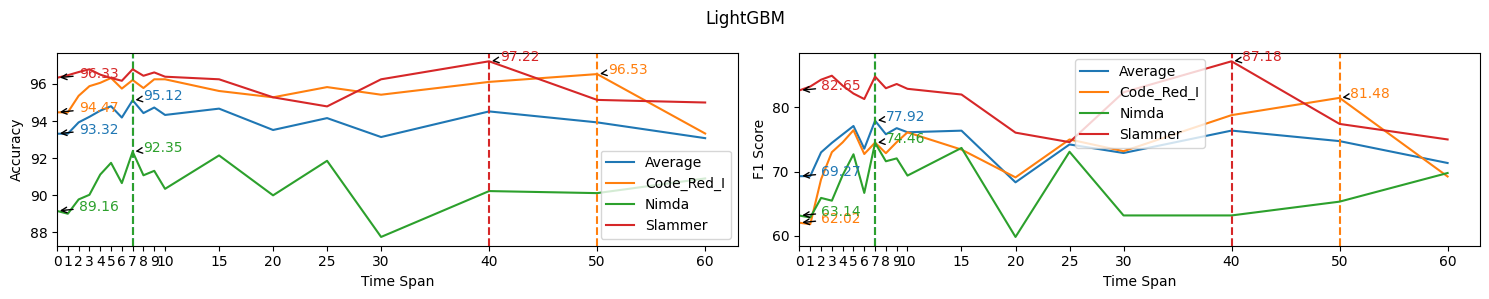

============================ XGBoost ============================

outlier: upper
agg_type: origin
Data combo: {'train': ['Code_Red_I', 'Nimda'], 'test': 'Slammer'}
Raw training datasets shape:  [(7200, 42), (8609, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (7308, 1301)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6331 869
Data combo: {'train': ['Nimda', 'Slammer'], 'test': 'Code_Red_I'}
Raw training datasets shape:  [(8609, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(7308, 1301), (6331, 869)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6600 600
Data combo: {'train': ['Code_Red_I', 'Slammer'], 'test': 'Nimda'}
Raw training datasets shape:  [(7200, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (6331, 869)]
Raw test dataset shape:  (8609, 42)
Raw test labels of regular and anomaly:  7308 1301
------------------------------ Time span: 0 -----------------

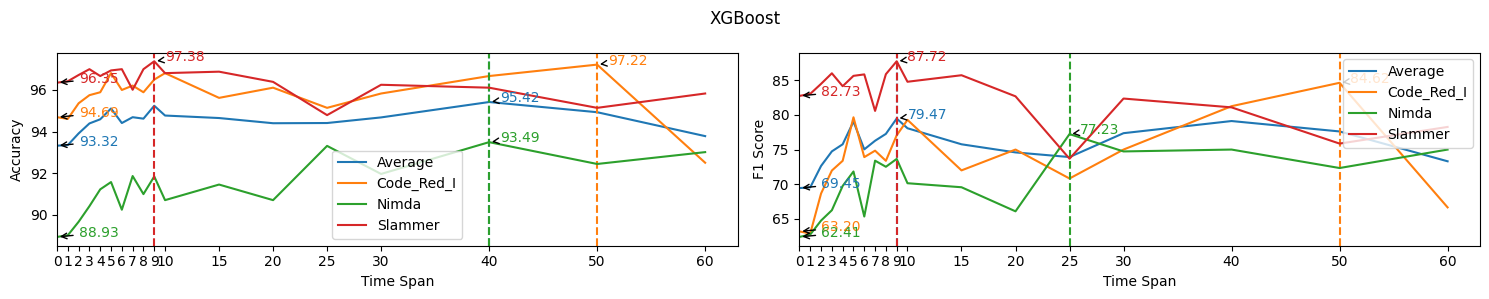

============================ CatBoost ============================

outlier: upper
agg_type: origin
Data combo: {'train': ['Code_Red_I', 'Nimda'], 'test': 'Slammer'}
Raw training datasets shape:  [(7200, 42), (8609, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (7308, 1301)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6331 869
Data combo: {'train': ['Nimda', 'Slammer'], 'test': 'Code_Red_I'}
Raw training datasets shape:  [(8609, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(7308, 1301), (6331, 869)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6600 600
Data combo: {'train': ['Code_Red_I', 'Slammer'], 'test': 'Nimda'}
Raw training datasets shape:  [(7200, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (6331, 869)]
Raw test dataset shape:  (8609, 42)
Raw test labels of regular and anomaly:  7308 1301
------------------------------ Time span: 0 ----------------

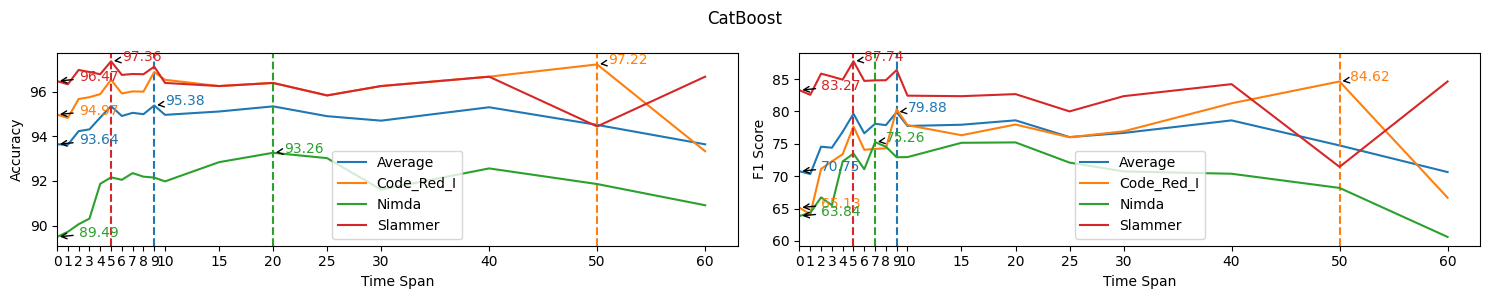

In [2]:
from src.xpr_test import *

time_span_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60]
data_combos = [{"train": ["Code_Red_I", "Nimda"], "test": "Slammer"},
                {"train": ["Nimda", "Slammer"], "test": "Code_Red_I"},
                {"train": ["Code_Red_I", "Slammer"], "test": "Nimda"},]

ALGORITHMS = ["LightGBM","XGBoost","CatBoost"]
for ALGORITHM in ALGORITHMS:
    print(f"============================ {ALGORITHM} ============================\n")
    results = aggregation_test(train_test, time_span_list, data_combos, normal_label = 0, results_file = f"xpr_{ALGORITHM}.csv")
    plot_aggregation_test_results(results, time_span_list, plot_precision_and_recall = False, title = f"{ALGORITHM}", plot_height = 3, auto_y = True)
